The target feature here is the Facies column.There are 9 facies presented as integers in the
dataset. The maping is as following:
1 - SS: Nonmarine sandstone
2 - CSiS: Nonmarine coarse siltstone
3 - FSiS: Nonmarine fine siltstone
4 - SiSH: Marine siltstone and shale
5 - MS: Mudstone (limestone)
6 - WS: Wackestone (limestone)
7 - D: Dolomite
8 - PS: Packstone-grainstone (limestone)
9 - BS: Phylloid-algal bafflestone (limestone)

The neighboring facies are somewhat constrained. For example facies 2 Coarse Siltstone is usually
adjacent to facies 1 (Sandstone) or facies 3 (Fine Siltstone).

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

Key data source: Data source is from Kaggle: https://www.kaggle.com/datasets/imeintanis/well-log-facies-dataset

In [149]:
#Import data from the csv file

In [150]:
data = pd.read_csv("facies_vectors.csv")
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


Column 0 Facies is the target feature. 
Column 4 to 8 are the conventional well logs
Column 9 NM_M: the facies is Marine or Nonmarine
Column 10 RELPOS: relative position, 

In [152]:
wellnames = data['Well Name'].unique()
print(wellnames)
len(wellnames)

['SHRIMPLIN' 'ALEXANDER D' 'SHANKLE' 'LUKE G U' 'KIMZEY A'
 'CROSS H CATTLE' 'NOLAN' 'Recruit F9' 'NEWBY' 'CHURCHMAN BIBLE']


10

In [153]:
formations = data['Formation'].unique()
print(formations)
len(formations)

['A1 SH' 'A1 LM' 'B1 SH' 'B1 LM' 'B2 SH' 'B2 LM' 'B3 SH' 'B3 LM' 'B4 SH'
 'B4 LM' 'B5 SH' 'B5 LM' 'C SH' 'C LM']


14

In [154]:
print(data.groupby(['Well Name','Formation']).agg({'Depth': ['min','max']}))

                        Depth        
                          min     max
Well Name   Formation                
ALEXANDER D A1 LM      2907.0  2939.0
            A1 SH      2887.5  2906.5
            B1 LM      2956.0  2966.0
            B1 SH      2939.5  2955.5
            B2 LM      2978.0  2987.5
...                       ...     ...
SHRIMPLIN   B4 SH      2911.0  2925.0
            B5 LM      2938.0  2948.0
            B5 SH      2930.0  2937.5
            C LM       2977.0  3028.0
            C SH       2948.5  2976.5

[127 rows x 2 columns]


Check if any formation is missing in any well

In [155]:
for well in wellnames :
    missingF = set(formations) - set(data.loc[data['Well Name']==well]['Formation'])
    if len(missingF) > 0:
        print('Well ', well, ' is missing formations: ', missingF)

Well  SHANKLE  is missing formations:  {'B3 LM'}
Well  CROSS H CATTLE  is missing formations:  {'B3 LM', 'B2 LM'}
Well  Recruit F9  is missing formations:  {'B3 LM', 'B5 SH', 'B3 SH', 'C SH', 'B2 SH', 'B1 LM', 'B4 SH', 'B4 LM', 'B1 SH'}
Well  CHURCHMAN BIBLE  is missing formations:  {'B5 SH'}


In [156]:
df = pd.DataFrame(True,index=wellnames,columns=formations)
for well in wellnames:
    flist = set(data.loc[data['Well Name']==well]['Formation'])
    for f in formations:
        if f not in flist :
            df.loc[well][f] = False
df

,A1 SH,A1 LM,B1 SH,B1 LM,B2 SH,B2 LM,B3 SH,B3 LM,B4 SH,B4 LM,B5 SH,B5 LM,C SH,C LM
SHRIMPLIN,True,True,True,True,True,True,True,True,True,True,True,True,True,True
ALEXANDER D,True,True,True,True,True,True,True,True,True,True,True,True,True,True
SHANKLE,True,True,True,True,True,True,True,False,True,True,True,True,True,True
LUKE G U,True,True,True,True,True,True,True,True,True,True,True,True,True,True
KIMZEY A,True,True,True,True,True,True,True,True,True,True,True,True,True,True
CROSS H CATTLE,True,True,True,True,True,False,True,False,True,True,True,True,True,True
NOLAN,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Recruit F9,True,True,False,False,False,True,False,False,False,False,False,True,False,True
NEWBY,True,True,True,True,True,True,True,True,True,True,True,True,True,True
CHURCHMAN BIBLE,True,True,True,True,True,True,True,True,True,True,False,True,True,True


Check if there is any null data

In [157]:
data.isnull().sum()

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
ILD_log10      0
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
dtype: int64

Missing data occurs only in PE log. Let's find out which well(s) are missing PE data

In [158]:
#check if any log curve is missing from any well
lognames = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']

for well in wellnames:
    for log in lognames:
        missinglog = data.loc[data['Well Name'] == well][log].isnull().sum()
        #print how many samples are missing for each well log in each well
        #if missinglog != 0:
        #    print('Well:', well, ', Log:', log, ', Missing samples: ', missinglog)
        
        #print the wells that are missing an entire log curve
        if missinglog == data.value_counts('Well Name')[well]:
            print('Log ', log, ' is missing in well ', well)

Log  PE  is missing in well  ALEXANDER D
Log  PE  is missing in well  KIMZEY A


In [159]:
lognames

['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']

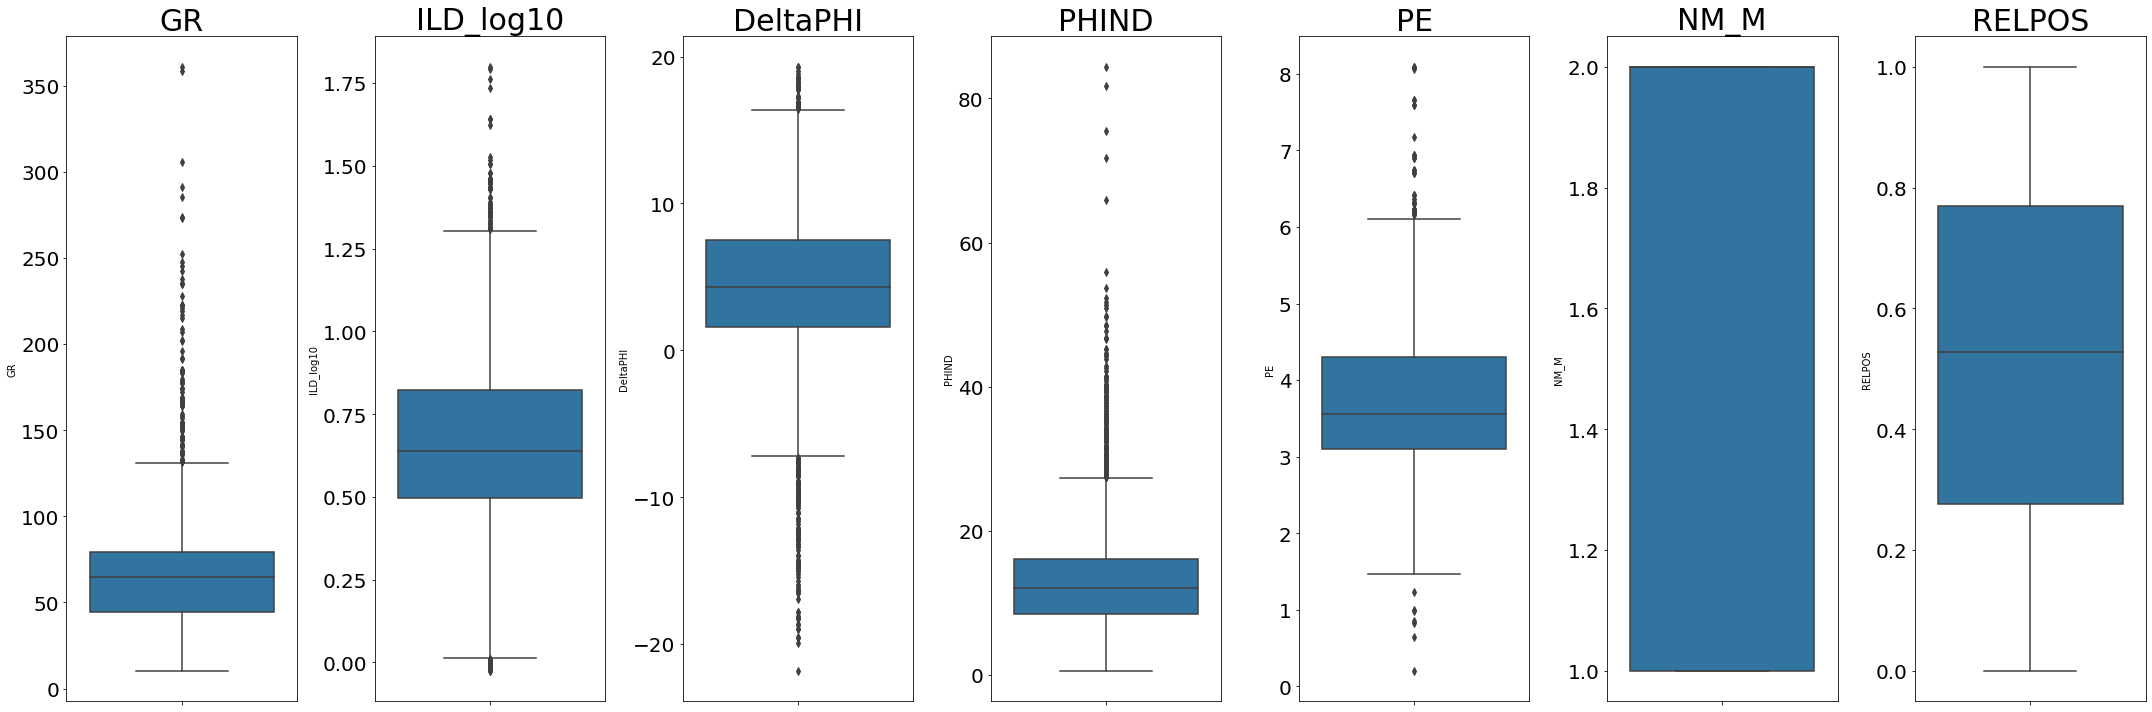

In [160]:
#plot each log curve to find possible outliers
fig, axes = plt.subplots(1, len(lognames), figsize=(30,10))
for i, ax in enumerate(axes.flat):
    sns.boxplot(data=data, y=data.iloc[:,i+4], ax=axes[i], orient='v')
    ax.set_title(data.columns[i+4], fontsize=30)
    ax.tick_params(axis='y', labelsize = 20)
plt.tight_layout()

All of the 5 logs are showing some outliers. These plots are made using data from all of the wells. Let's make the box plots for each well see if any of the wells have "bad" data.

In [161]:
wellnames

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [162]:
# split data into several smaller dataframes, one for each well
shrimplin = data.loc[data['Well Name']=='SHRIMPLIN']
alexander_d = data.loc[data['Well Name']=='ALEXANDER D']
shankle = data.loc[data['Well Name']=='SHANKLE']
luke_g_u = data.loc[data['Well Name']=='LUKE G U']
kimzey_a = data.loc[data['Well Name']=='KIMZEY A']
cross_h_cattle = data.loc[data['Well Name']=='CROSS H CATTLE']
nolan = data.loc[data['Well Name']=='NOLAN']
recruite_f9 = data.loc[data['Well Name']=='Recruit F9']
newby = data.loc[data['Well Name']=='NEWBY']
churchman_bible = data.loc[data['Well Name']=='CHURCHMAN BIBLE']

In [163]:
dflist = [shrimplin,alexander_d,shankle,luke_g_u,kimzey_a,cross_h_cattle,nolan,recruite_f9,newby,churchman_bible]

In [164]:
loglist = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']

In [165]:
#plot each log curve to find where the outliers occur
def log_boxplot(welldfs, welllist, log):
    fig, axes = plt.subplots(1, len(welldfs), figsize=(30,10))
    for i, ax in enumerate(axes.flat):
        sns.boxplot(data=welldfs[i], y=log, ax=axes[i], orient='v')
        ax.set_title(log, fontsize=30)
        ax.set_xlabel(welllist[i], fontsize=20)
        ax.tick_params(axis='both', labelsize = 20)
    plt.tight_layout()


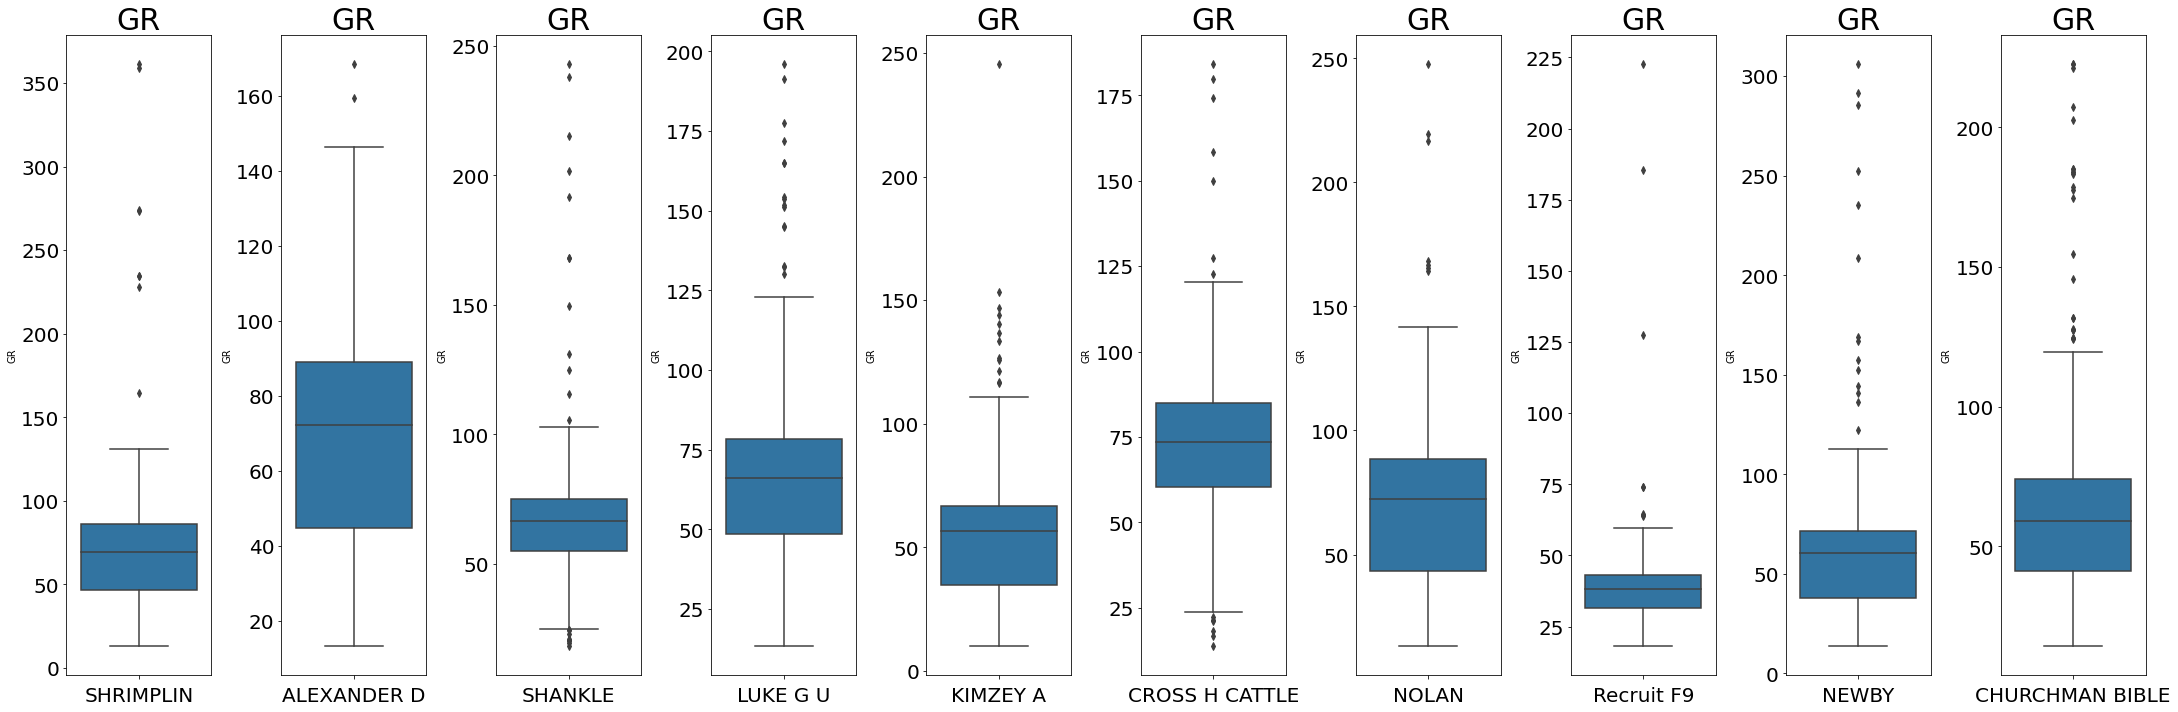

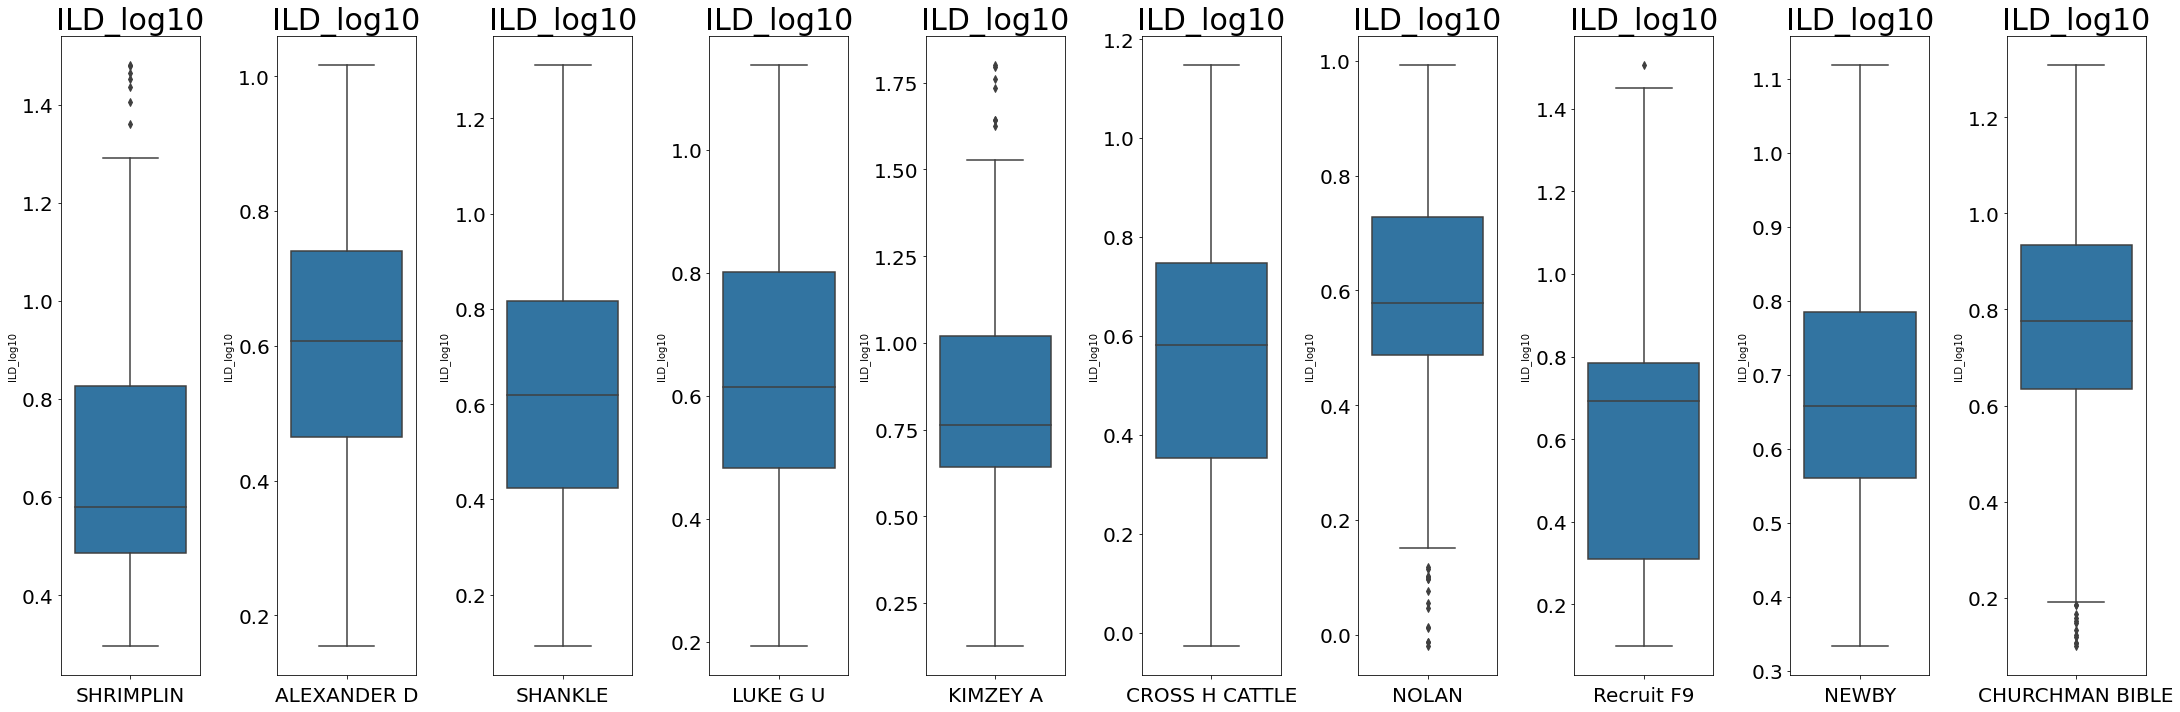

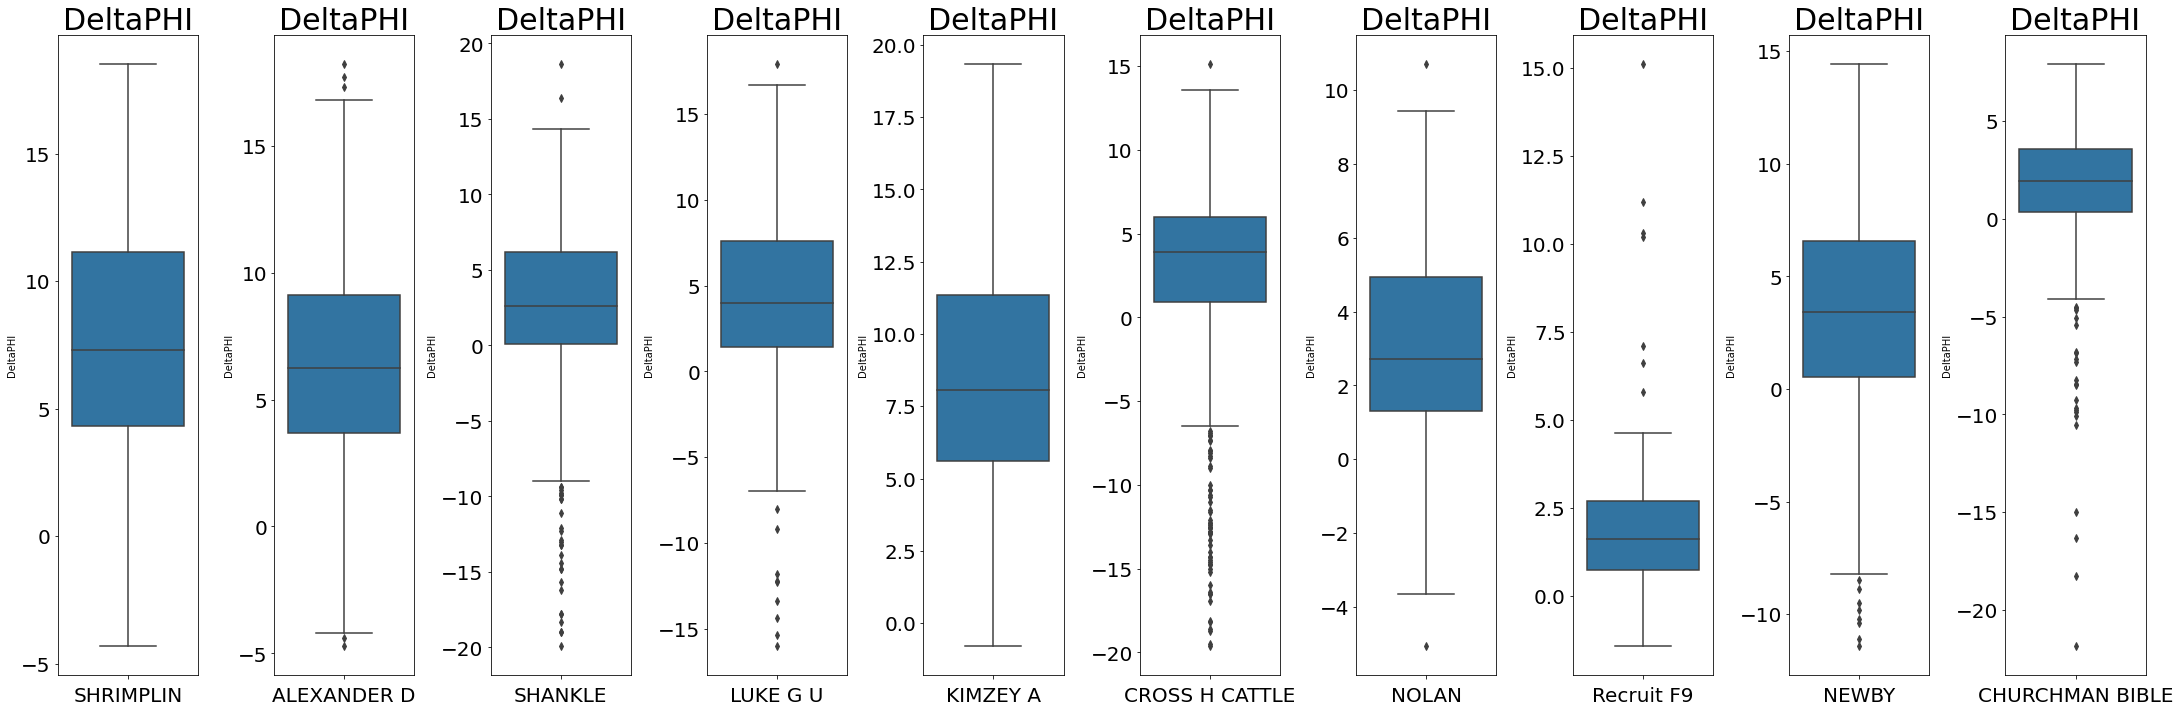

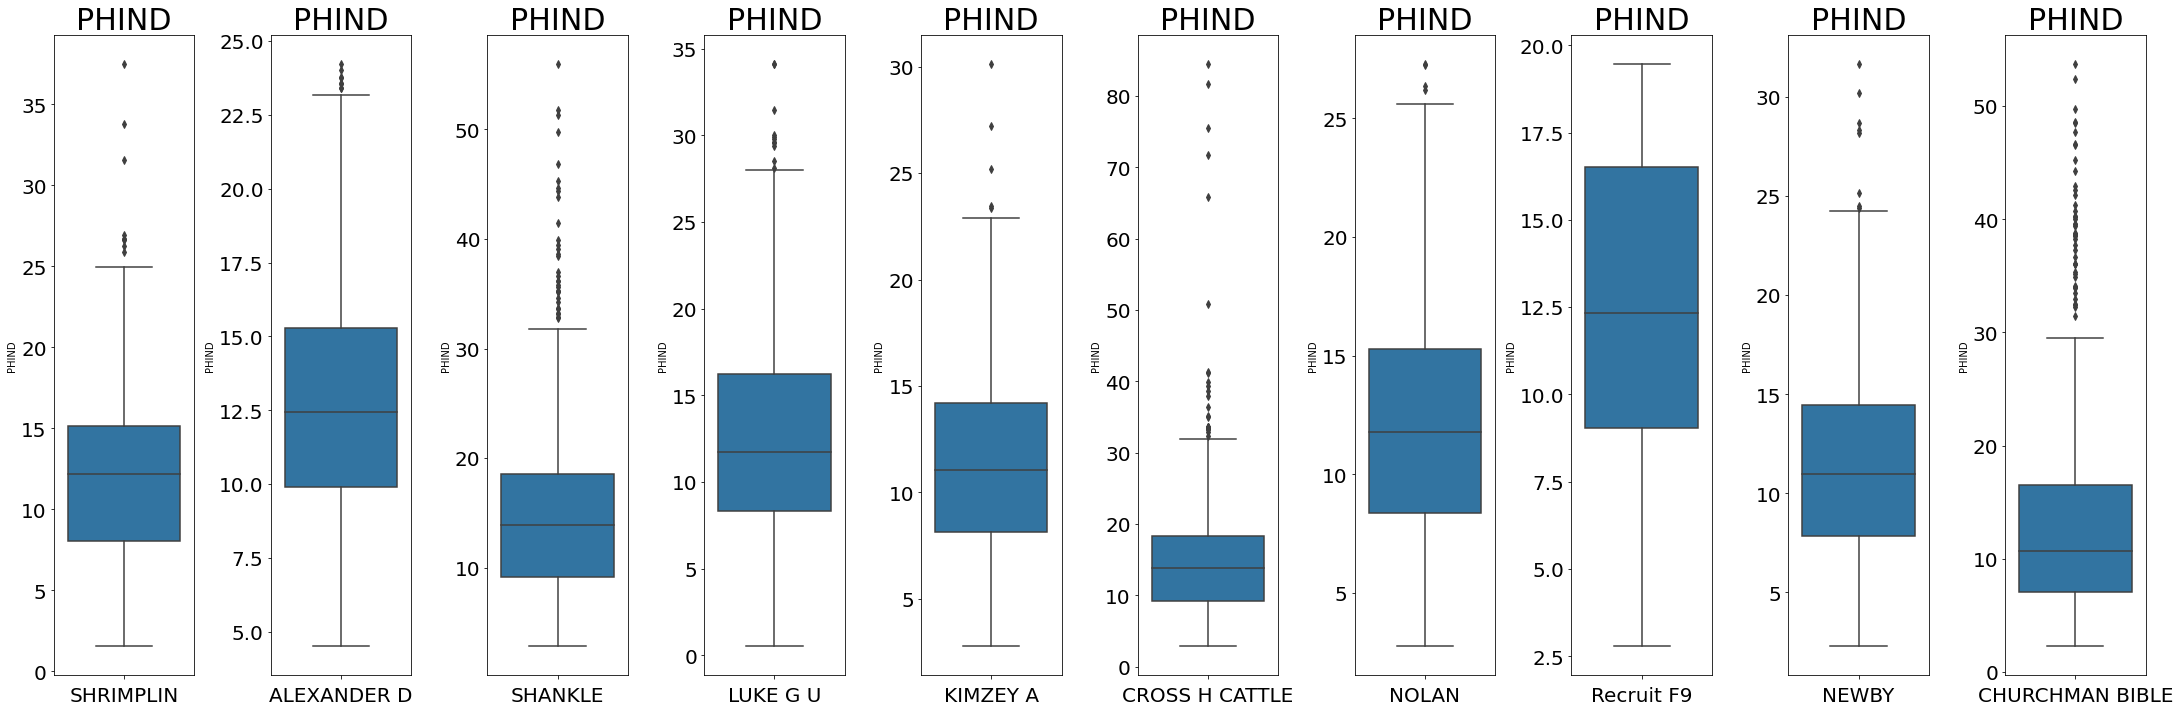

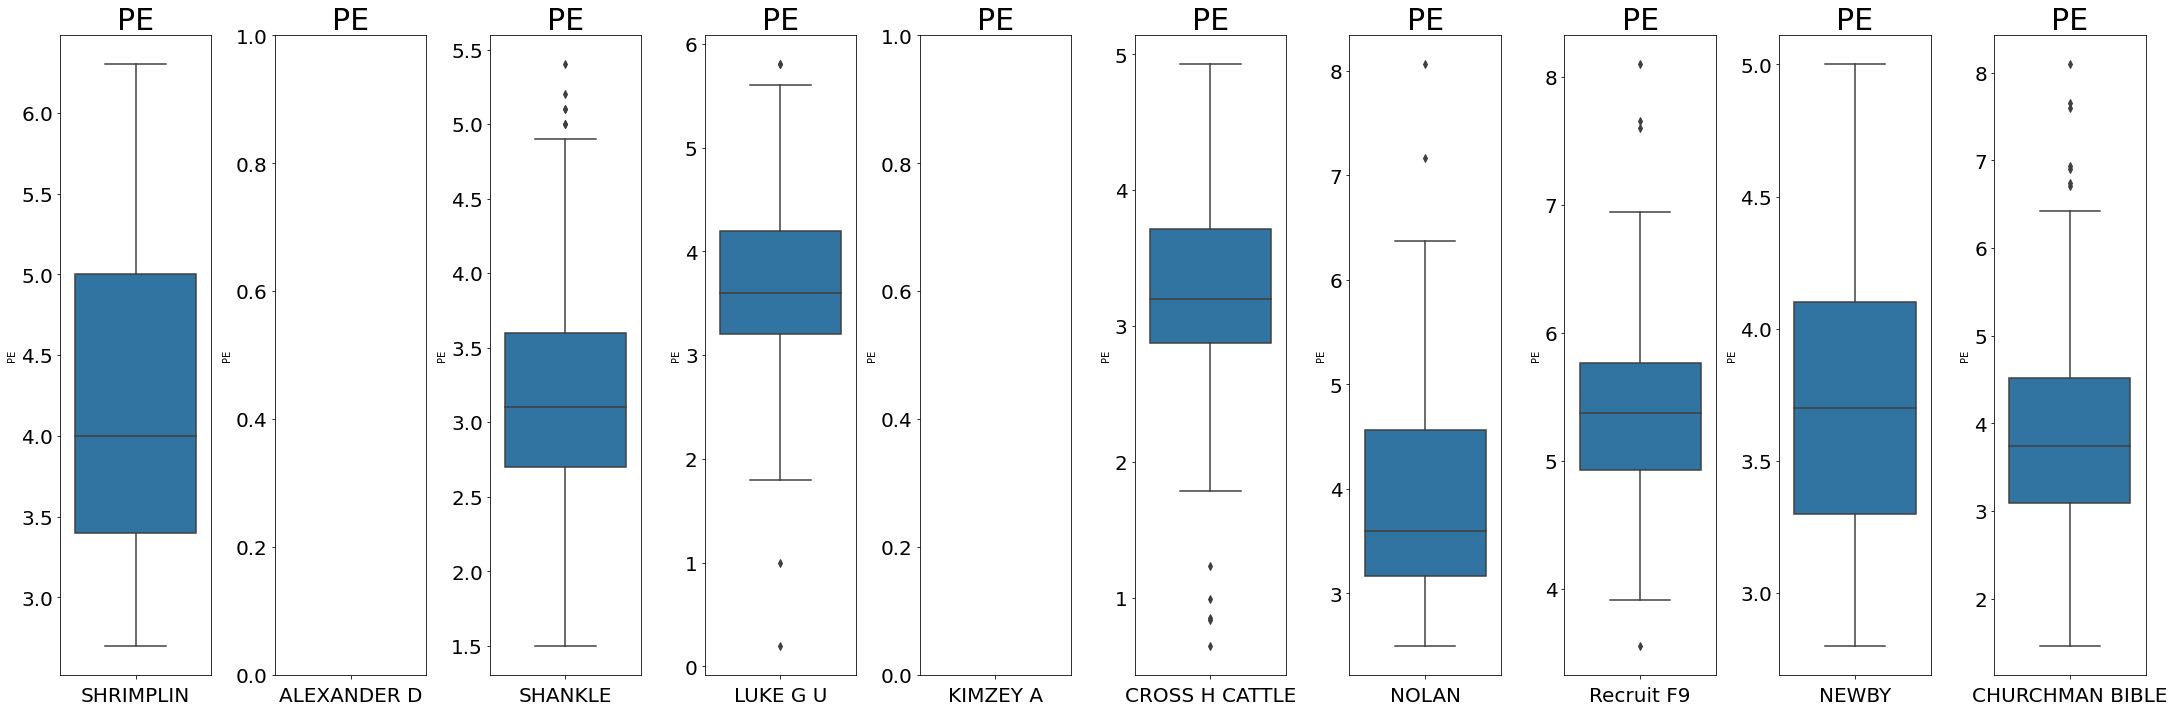

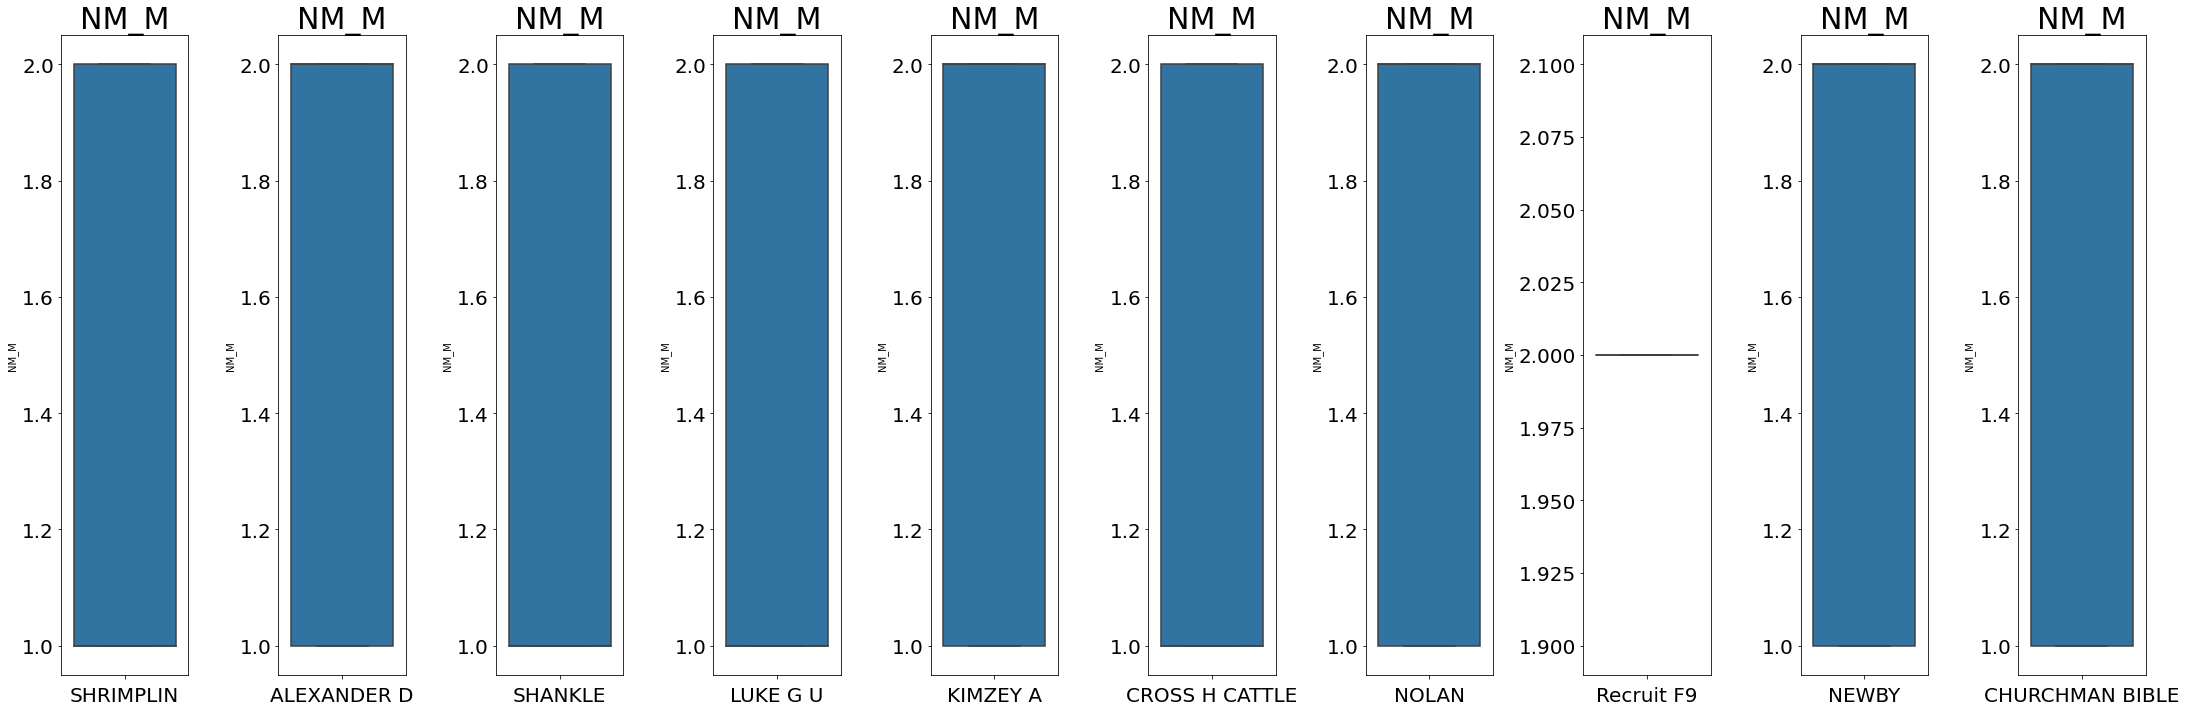

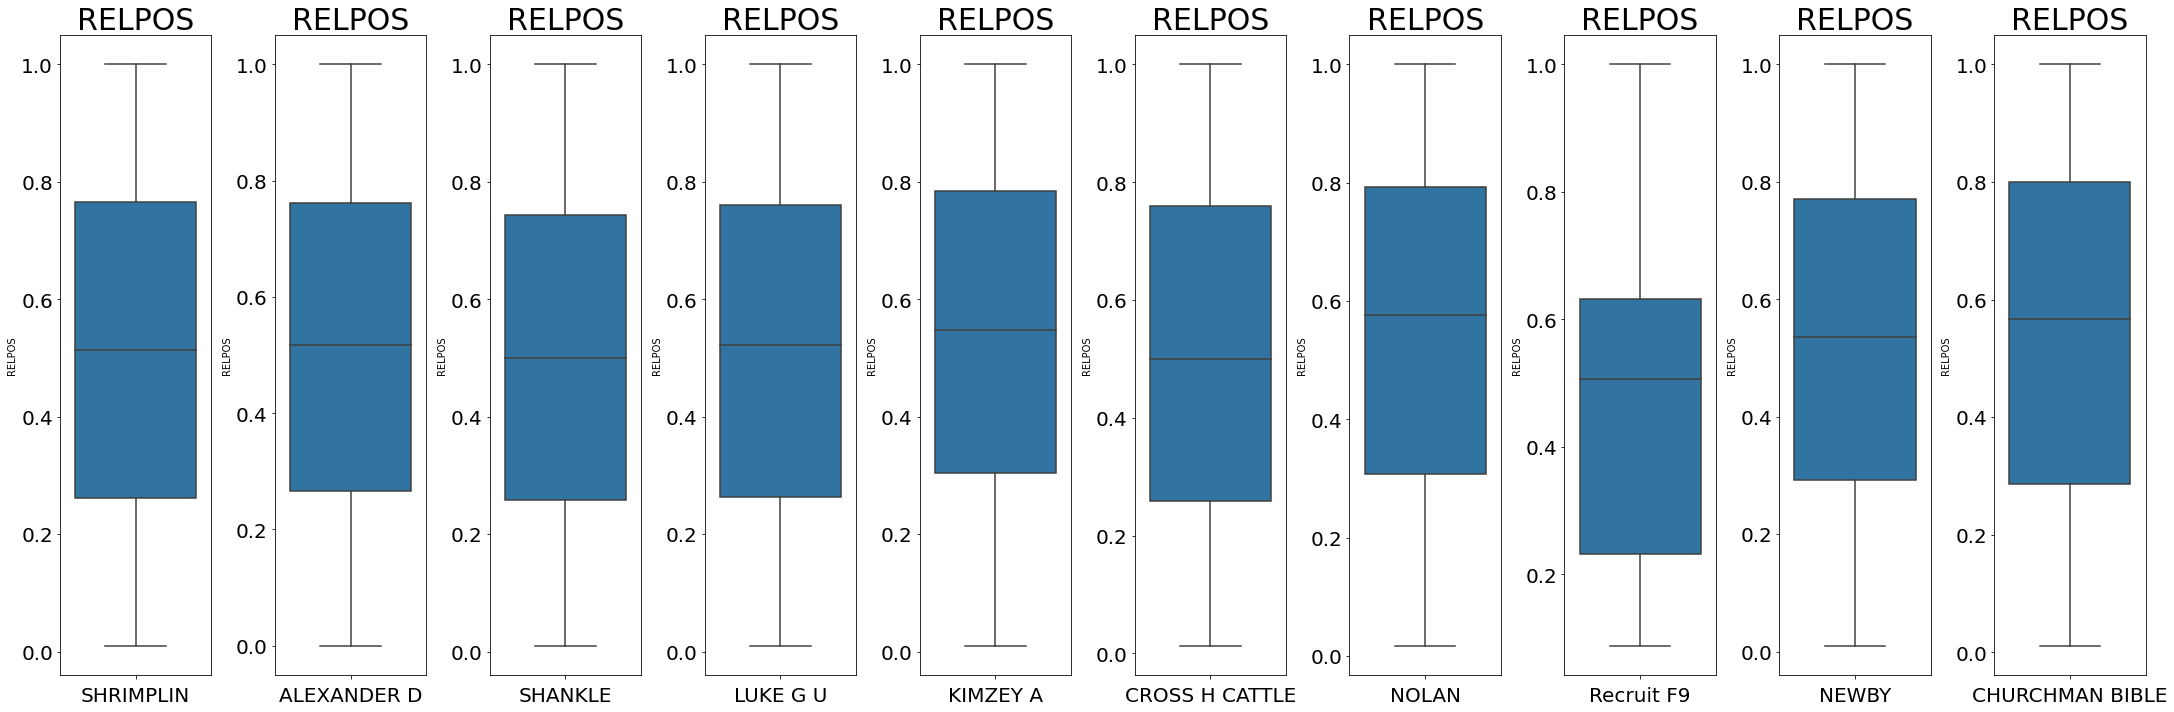

In [166]:
for log in lognames:    
    log_boxplot(dflist, wellnames, log)

From the boxplots, we can see that most of the log curves are in good shape, and the data ranges are consistent among the wells, with one exception of well 'Recruit F9', where the 'GR', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS' are not in the similar range as the other wells. Let's display the logs for each well, one by one, to see how they look.

In [167]:
def displayLogs(df):
    fig, axes = plt.subplots(1, 5, figsize=(30,10))
    logs = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
    for i, log in enumerate(logs):
        axes[i].plot(log, 'Depth', data=df)
        axes[i].set_title(log, fontsize=30)
        axes[i].set_xlabel(df['Well Name'].unique()[0], fontsize=30)
        axes[i].tick_params(labelsize=15)

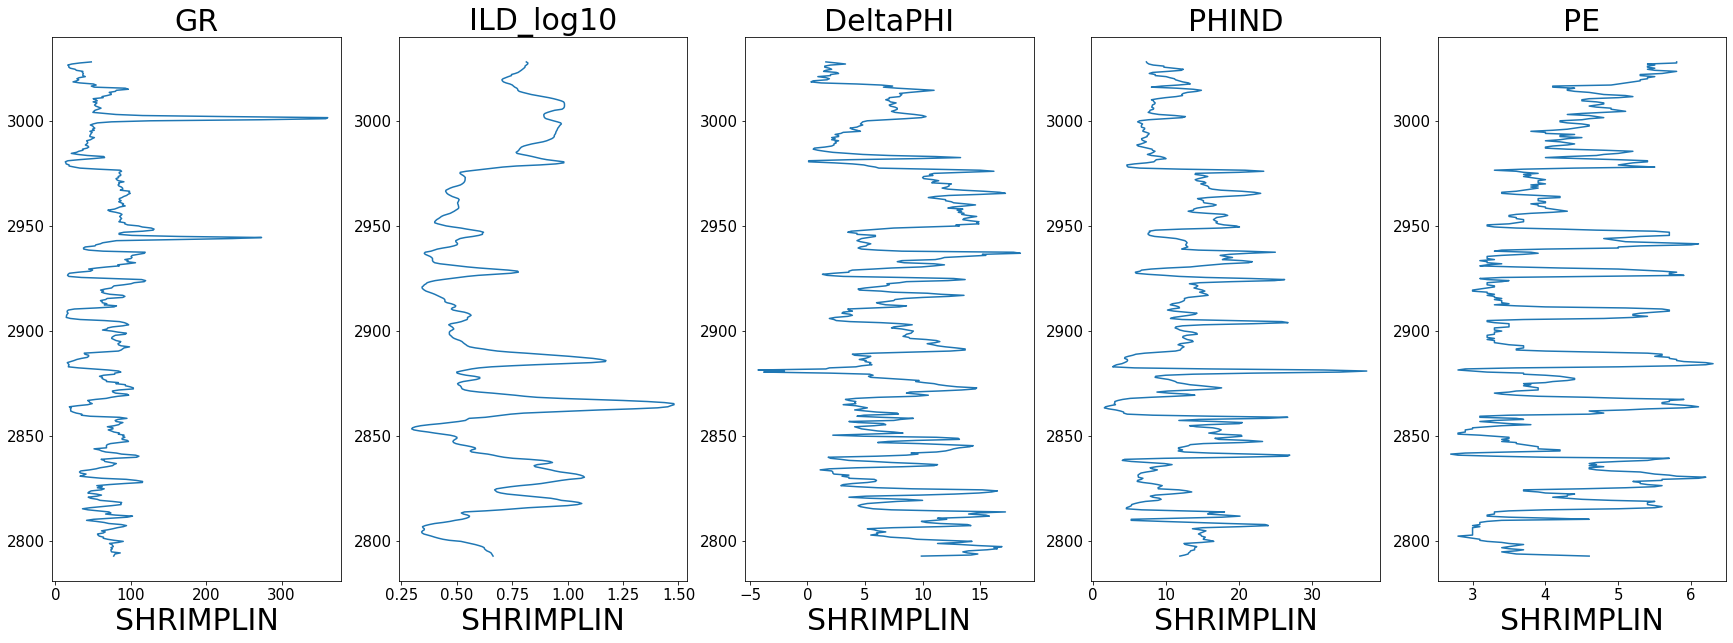

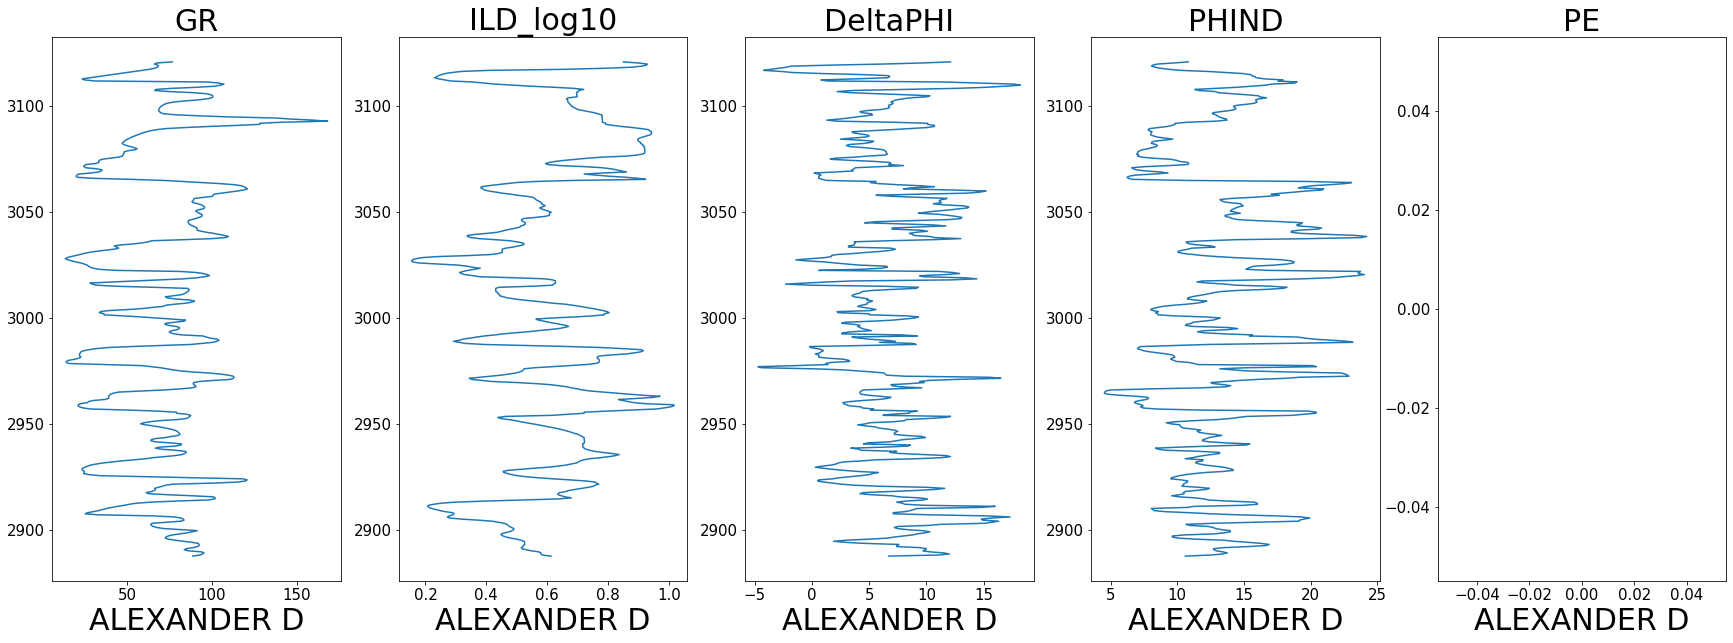

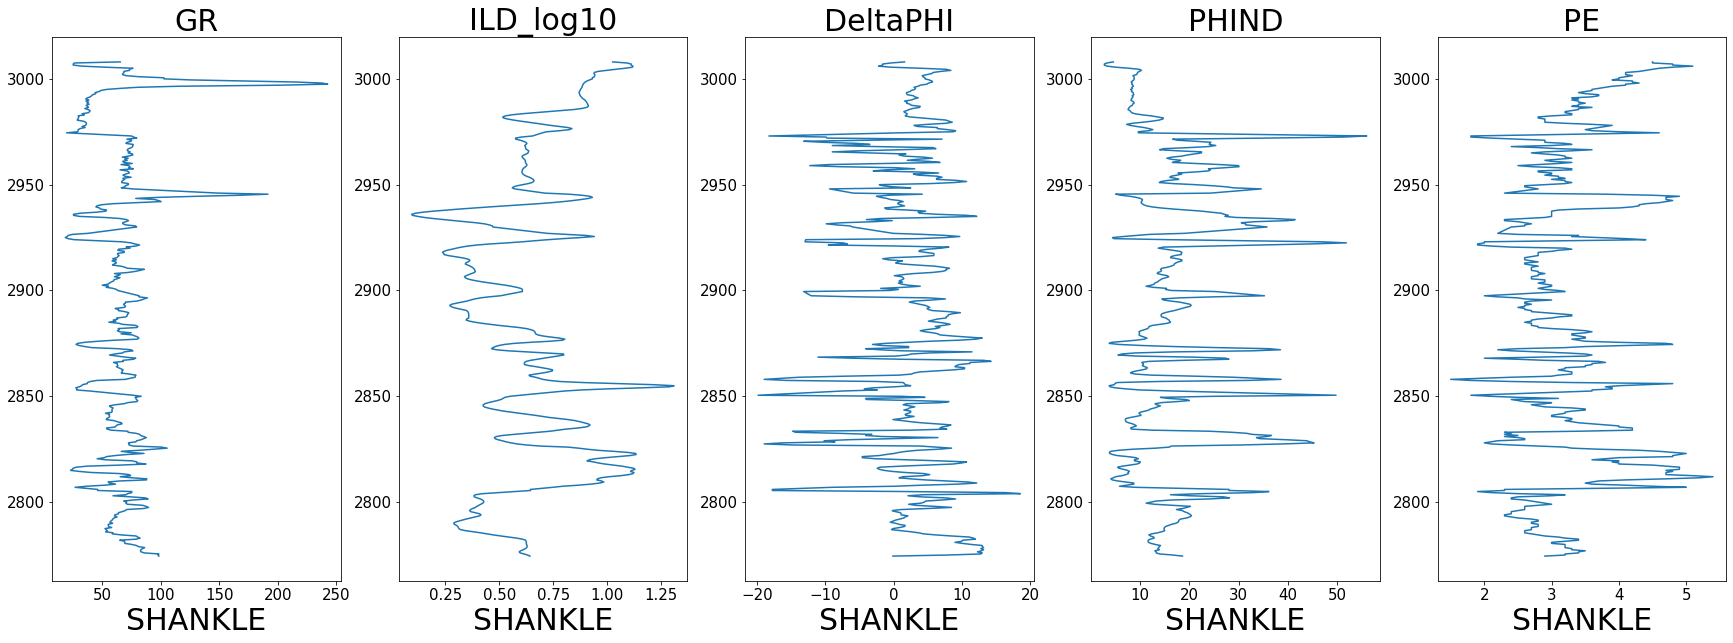

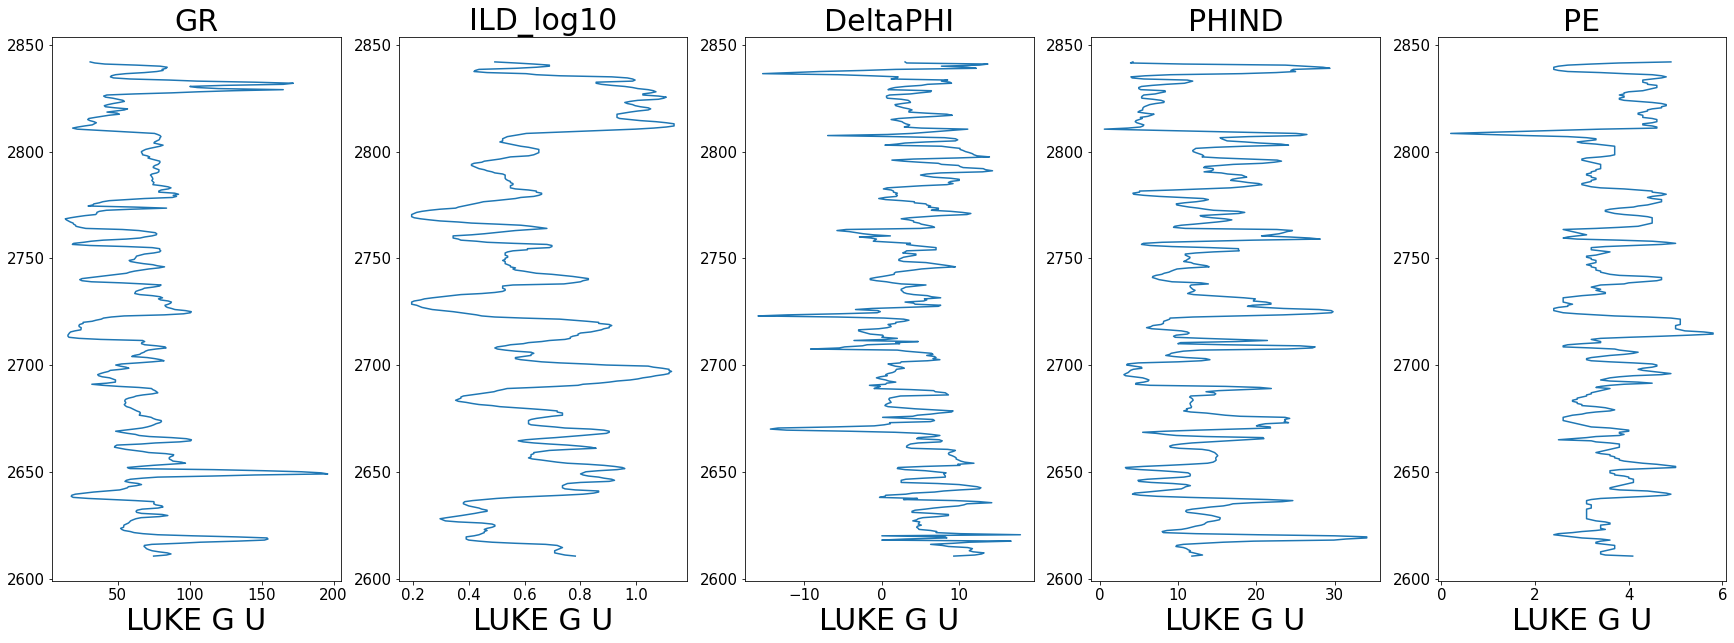

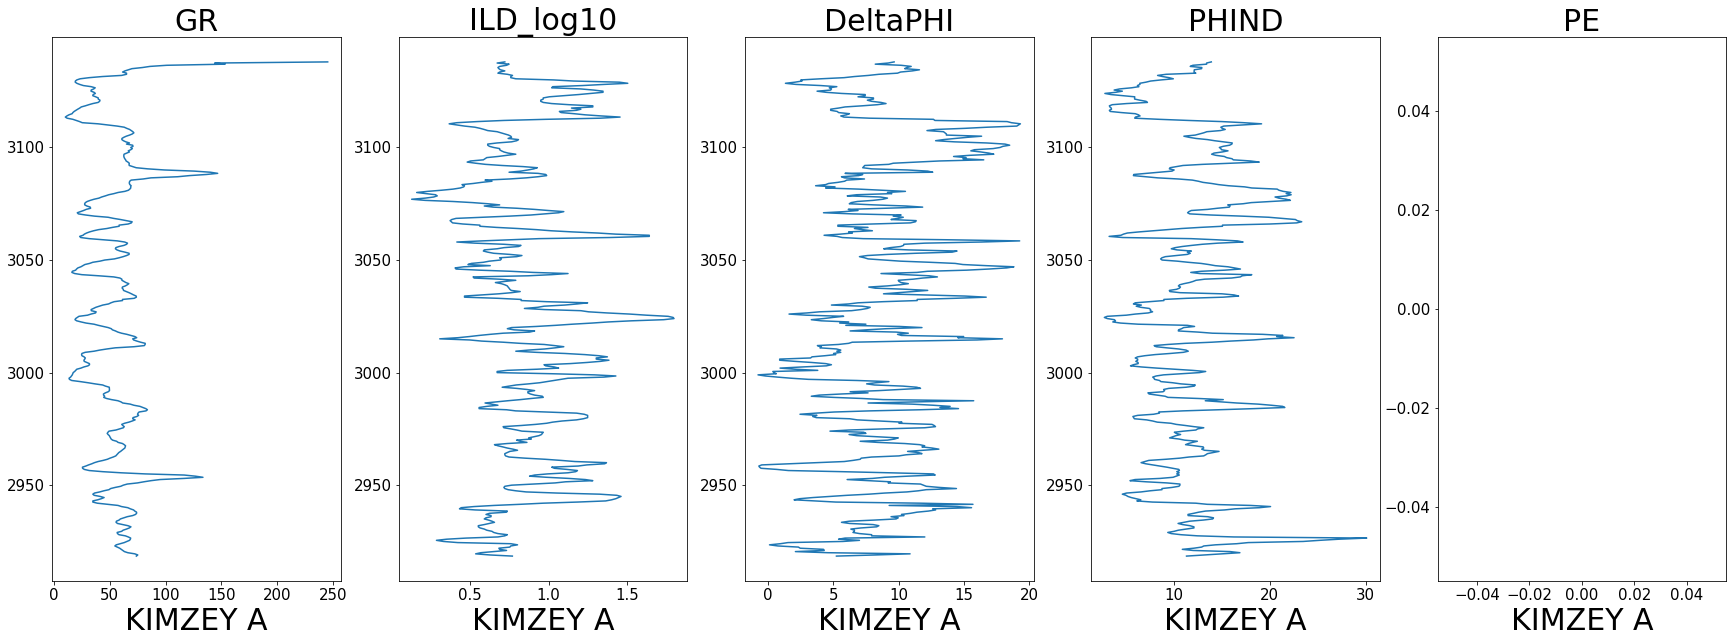

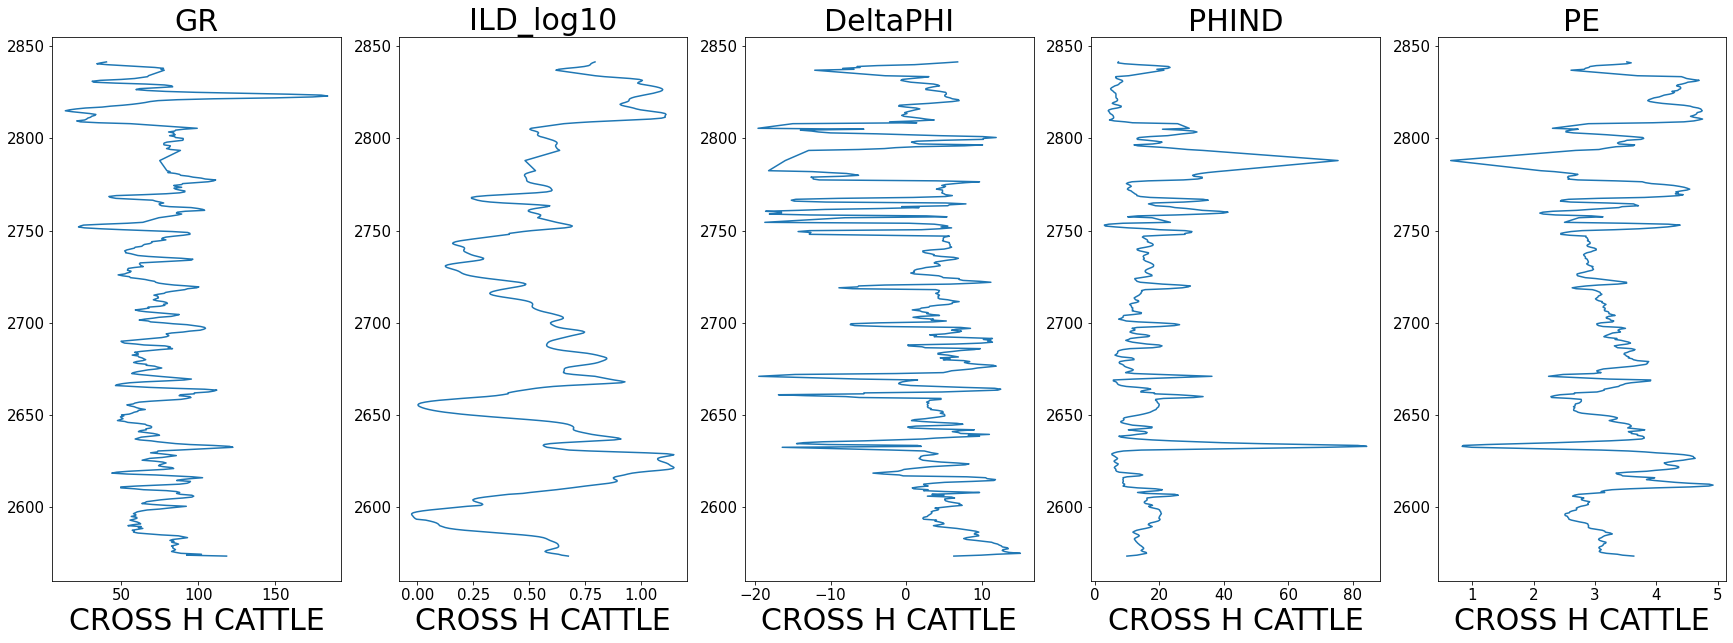

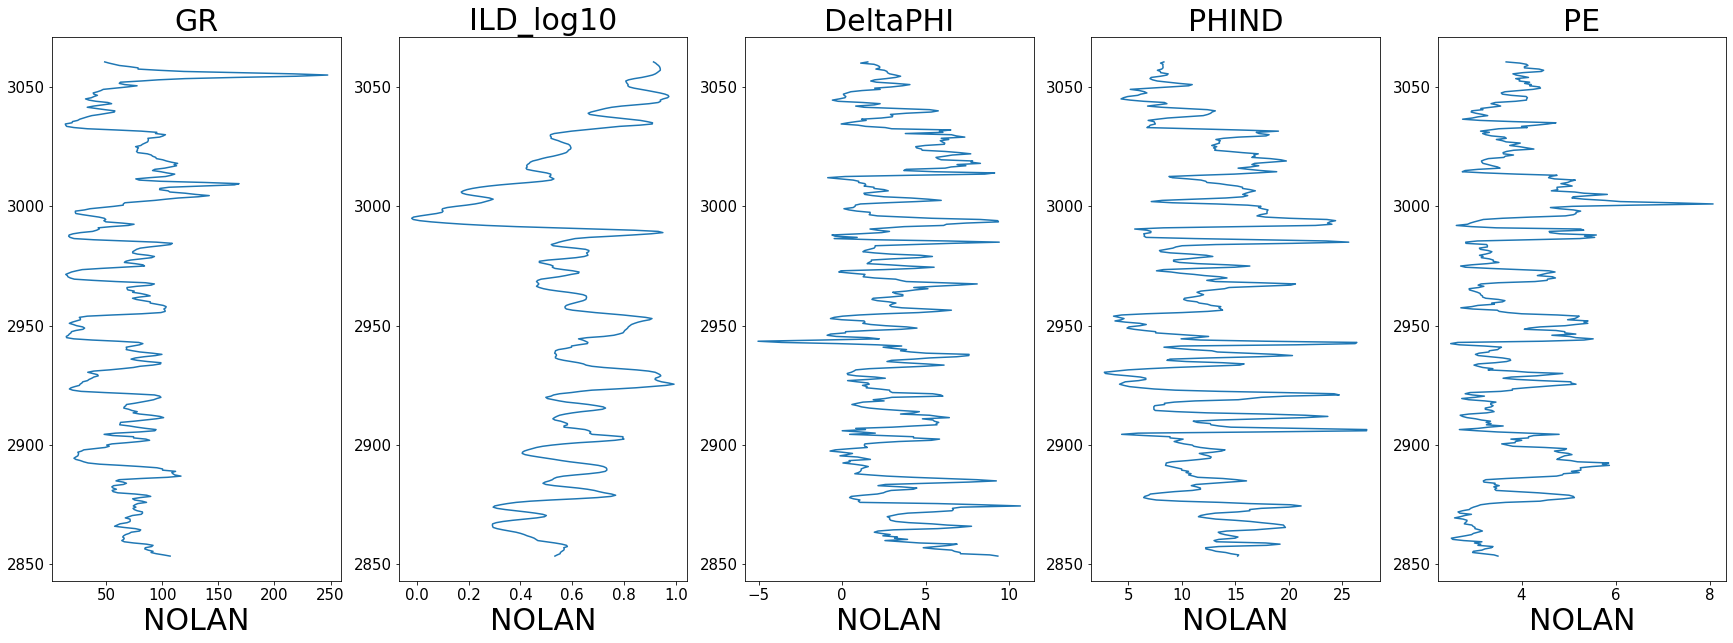

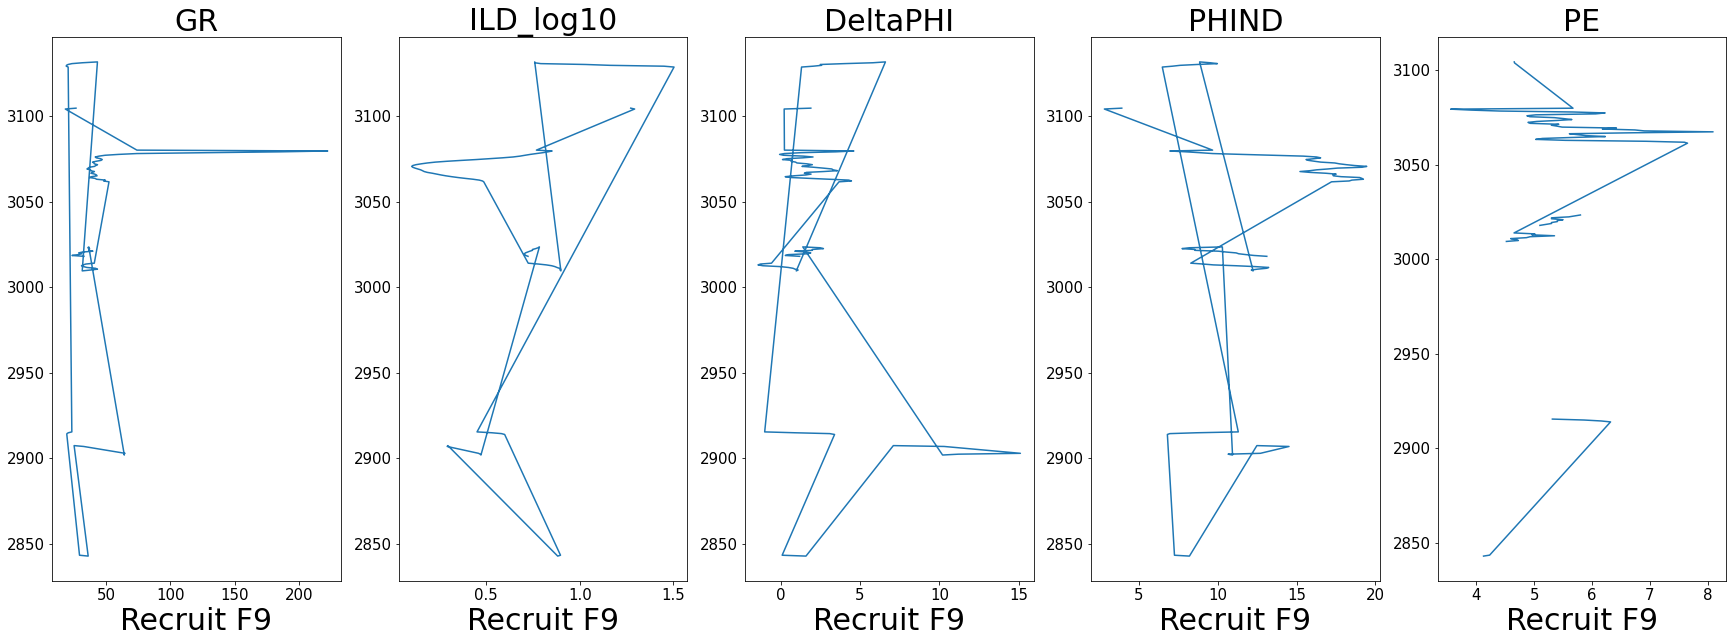

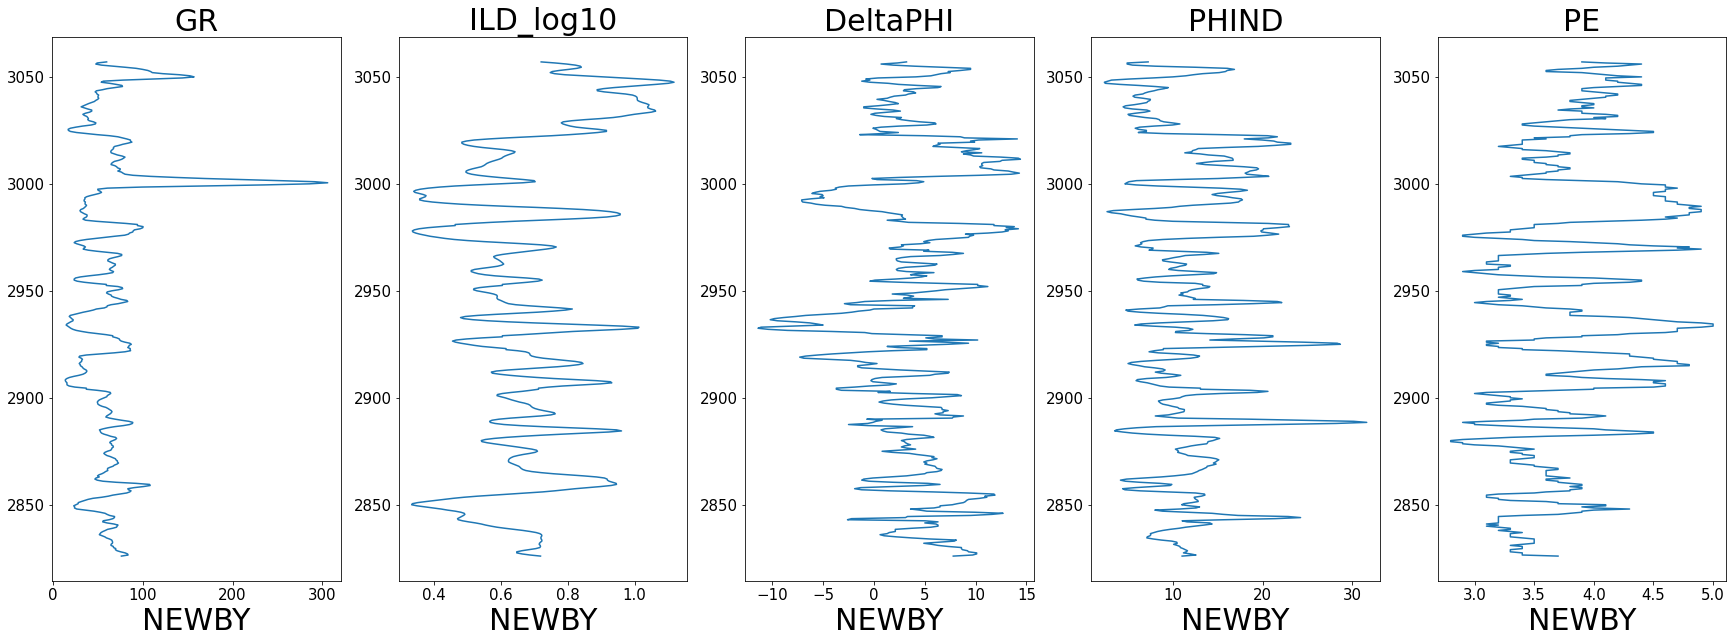

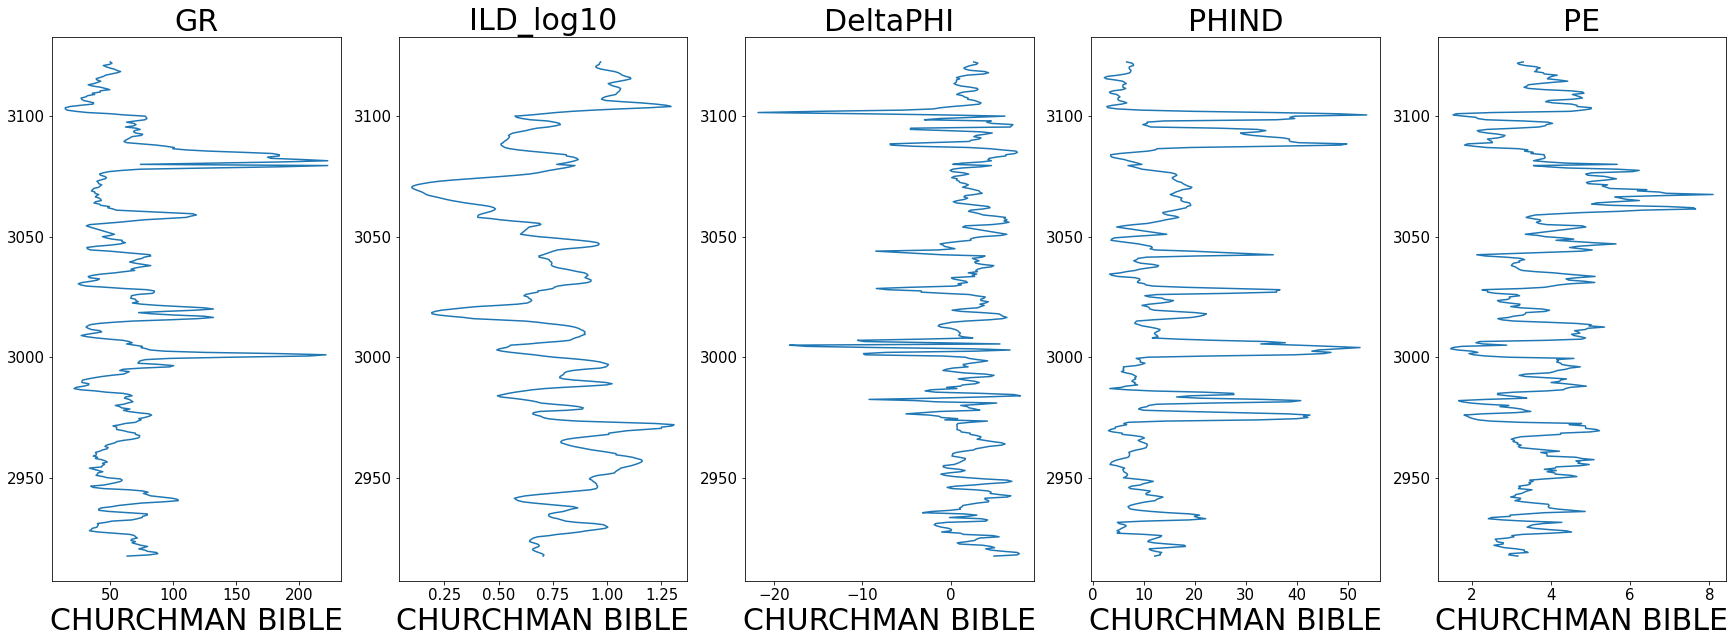

In [168]:
# display logs for each well
for df in dflist:
    displayLogs(df)

Now we can clearly see that Well Recruit F9 is very suspicious. We will drop this well in its entirety.
The other wells seem to be ok except that PE log is missing in two wells 'ALEXANDER D' AND 'KIMZEY A'. Next we will need to decide whether we should drop these two well because of the missing PE curve. Or, we can estimate PE from other logs if a good pattern can be observed there. So, let's plot the correlation between PE and the other logs.

In [169]:
# First let's remove well "Recruit F9"
data = data.loc[data['Well Name'] != 'Recruit F9']

Text(0.5, 0, 'GR')

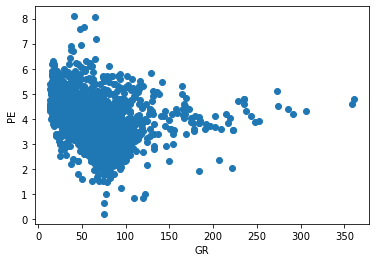

In [170]:
#plot GR vs. PE
plt.plot(figsize=(25,6))
plt.scatter('GR', 'PE', data=data)
plt.ylabel('PE')
plt.xlabel('GR')

Text(0.5, 0, 'ILD_log10')

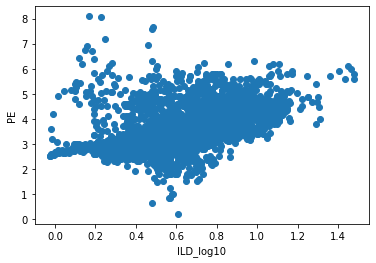

In [171]:
#plot ILD_log10 vs PE
plt.plot(figsize=(25,6))
plt.scatter('ILD_log10', 'PE', data=data)
plt.ylabel('PE')
plt.xlabel('ILD_log10')

Text(0.5, 0, 'DeltaPHI')

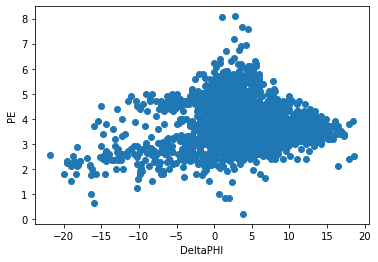

In [172]:
#plot DeltaPHI vs PE
plt.plot(figsize=(25,6))
plt.scatter('DeltaPHI', 'PE', data=data)
plt.ylabel('PE')
plt.xlabel('DeltaPHI')

Text(0.5, 0, 'PHIND')

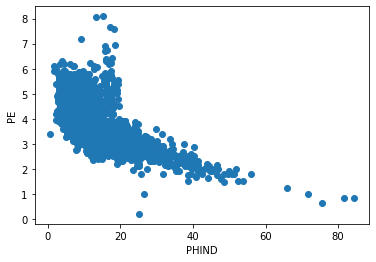

In [173]:
# plot PHIND vs PE
plt.plot(figsize=(25,6))
plt.scatter('PHIND', 'PE', data=data)
plt.ylabel('PE')
plt.xlabel('PHIND')

There seems to be a reasonable correlation between PE and PHIND. We can try to predict PE using PHIND for the two wells in which PE is missing.
A linear regression model seems to be able to work here. But before building the model, let's remove some outliers in the dataset.

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [175]:
wellnames

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [176]:
PHIND = data.loc[(data['Well Name'] != 'ALEXANDER D') & (data['Well Name'] != 'KIMZEY A'),'PHIND']
PE = data.loc[:, 'PE']
PE.dropna(inplace=True)
print(PHIND.shape)
print(PE.shape)

(3164,)
(3164,)


In [177]:
X_train, X_test, y_train, y_test = train_test_split(PHIND, PE, test_size=0.4, random_state=101)

In [178]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

X_test=pd.DataFrame(X_train)
y_test=pd.DataFrame(y_train)


In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [180]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [181]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [182]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
y_predicted = poly_reg_model.predict(X_test_poly)

In [183]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 0.49340434336634614
MSE: 0.44013004574932413
RMSE: 0.6634229765009079


Text(0, 0.5, 'predicted PE')

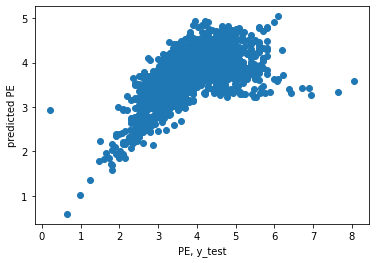

In [184]:
plt.scatter(y_test, y_predicted)
plt.xlabel('PE, y_test')
plt.ylabel('predicted PE')

In [185]:
y_predicted_train = poly_reg_model.predict(X_train_poly)

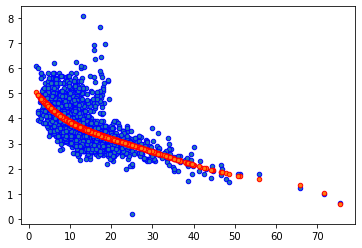

In [186]:
#plot the train split (blue dots) and the predicted y of the X_train
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.scatter(X_train, y_predicted_train, label="Model", s=20, edgecolor='r')

Should I drop PE logs, or, should I use PHIND to make a very rough prediction of PE???